In [79]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install --upgrade plotly
!pip install selenium webdriver-manager
!pip install yfinance selenium webdriver-manager pandas plotly

In [46]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import requests
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
import time

In [3]:
import plotly.io as pio
pio.renderers.default = "iframe"

In [4]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [5]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()
    from IPython.display import display, HTML
    fig_html = fig.to_html()
    display(HTML(fig_html))

In [6]:
tesla = yf.Ticker("TSLA")

In [10]:
ticker_symbol = "TSLA"  # Replace with any stock symbol you want
stock_data = yf.download(ticker_symbol, start="2023-01-01", end="2024-01-01")


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [12]:
stock_data.head()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2023-01-03,108.099998,118.800003,104.639999,118.470001,231402800
2023-01-04,113.639999,114.589996,107.519997,109.110001,180389000
2023-01-05,110.339996,111.750000,107.160004,110.510002,157986300
2023-01-06,113.059998,114.389999,101.809998,103.000000,220911100
2023-01-09,119.769997,123.519997,117.110001,118.959999,190284000


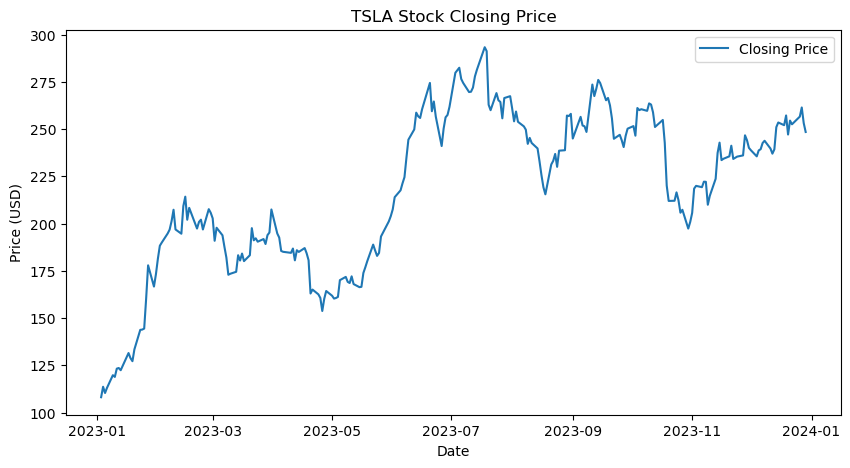

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(stock_data['Close'], label='Closing Price')
plt.title(f"{ticker_symbol} Stock Closing Price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

In [16]:
stock_data.to_csv(f"{ticker_symbol}_stock_data.csv")


In [24]:
soup = BeautifulSoup(response.text, "html.parser")

In [26]:
tables = soup.find_all("table")
for index, table in enumerate(tables):
    print(f"Table {index}:")
    print(table.prettify()[:500])  # Print first 500 characters to inspect the table
    print("\n\n")

In [32]:
print(soup.prettify()[:2000]) 

<html>
 <head>
 </head>
 <body>
  <div style="margin: 50px auto; width: 50%; border: 1px solid #dfdfdf; padding: 20px 50px 30px 50px; font-family:helvetica;">
   <h1>
    We do not allow automated access to our servers.
   </h1>
   <h2>
    <p>
     Automated access to our data is prohibited by our data provider.
    </p>
    <p>
     If you are a user attempting to access the site via a browser, please follow this process to regain access:
    </p>
    <ul>
     <li>
      Go to
      <a href="https://whatismyipaddress.com/" rel="noopener noreferrer" target="_blank">
       whatismyipaddress
      </a>
      and obtain your IPv4 address
     </li>
     <li>
      Email us your IPv4 address at
      <a class="__cf_email__" data-cfemail="4821262e270825292b3a273c3a2d262c3b66262d3c" href="/cdn-cgi/l/email-protection">
       [email protected]
      </a>
     </li>
     <li>
      We will add you to our whitelist within 24 hours
     </li>
    </ul>
   </h2>
  </div>
  <script data-cfasync

In [34]:
tables = soup.find_all("table")
print(f"Number of tables found: {len(tables)}")

for index, table in enumerate(tables):
    print(f"Table {index}:")
    print(table.prettify()[:500])  # Print first 500 characters of each table
    print("\n\n")

Number of tables found: 0


In [47]:
# Setup Selenium WebDriver
options = webdriver.ChromeOptions()
options.add_argument("--headless")  # Run without opening a browser
options.add_argument("--disable-gpu")
options.add_argument("--no-sandbox")

# Initialize WebDriver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

In [48]:
# Open Tesla's revenue page
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
driver.get(url)

# Wait for content to load
time.sleep(3)  # Adjust wait time if necessary

In [49]:
# Find the table
table = driver.find_element(By.XPATH, '//table[contains(@class, "historical_data_table")]')
rows = table.find_elements(By.TAG_NAME, "tr")

# Extract table data
data = []
for row in rows[1:]:  # Skip the header row
    cols = row.find_elements(By.TAG_NAME, "td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        data.append([date, revenue])

# Close the WebDriver
driver.quit()


In [ ]:
# Convert to DataFrame
df = pd.DataFrame(data, columns=["Date", "Revenue"])

# Clean revenue column (remove $ and commas, convert to float)
df["Revenue"] = df["Revenue"].replace({"$": "", ",": ""}, regex=True).astype(float)

# Display the first few rows
df.head()


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(df["Date"], df["Revenue"], marker="o", linestyle="-", color="b")
plt.title("Tesla Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue (in USD)")
plt.xticks(rotation=45)
plt.grid()
plt.show()


In [ ]:
df.to_csv("Tesla_Revenue_Data.csv", index=False)
print("Data saved to Tesla_Revenue_Data.csv")


In [53]:
# Define the stock ticker symbol
ticker = "GME"

# Fetch historical data (default: 1 month)
gme_data = yf.download(ticker, start="2020-01-01", end="2024-03-10", progress=False)

# Display the first few rows
gme_data.head()


Price,Close,High,Low,Open,Volume
Ticker,GME,GME,GME,GME,GME
Date,,,,,
2020-01-02,1.5775,1.6175,1.5175,1.5350,17814400
2020-01-03,1.4700,1.5625,1.4600,1.5525,14175600
2020-01-06,1.4625,1.4775,1.4000,1.4500,13579200
2020-01-07,1.3800,1.4575,1.3600,1.4425,20912000
2020-01-08,1.4300,1.4625,1.3525,1.3725,22517600


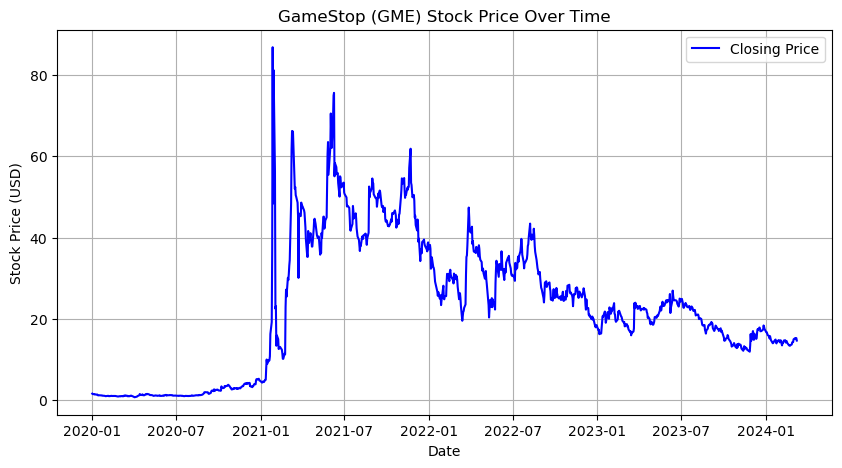

In [55]:
# Plot the closing price over time
plt.figure(figsize=(10,5))
plt.plot(gme_data.index, gme_data["Close"], color='blue', label="Closing Price")

plt.title("GameStop (GME) Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.grid()
plt.show()


In [57]:
gme_data.to_csv("GME_Stock_Data.csv")
print("GameStop stock data saved as GME_Stock_Data.csv")


GameStop stock data saved as GME_Stock_Data.csv


In [ ]:
# Convert to DataFrame
df = pd.DataFrame(data, columns=["Date", "Revenue"])

# Clean revenue column (remove $ and commas, convert to float)
df["Revenue"] = df["Revenue"].replace({"$": "", ",": ""}, regex=True).astype(float)

# Display the first few rows
df.head()


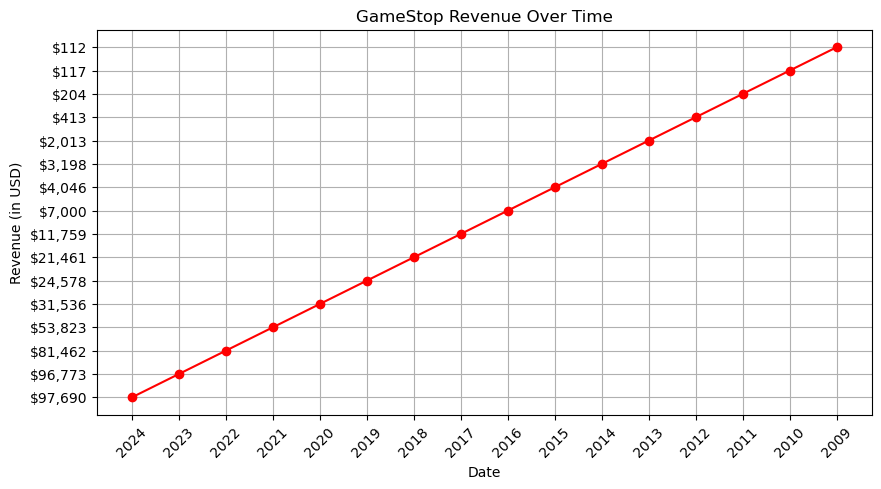

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(df["Date"], df["Revenue"], marker="o", linestyle="-", color="red")
plt.title("GameStop Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue (in USD)")
plt.xticks(rotation=45)
plt.grid()
plt.show()


In [71]:
ticker = "TSLA"
tesla_stock = yf.download(ticker, start="2020-01-01", end="2024-03-10", progress=False)

# Display the first few rows
tesla_stock.head()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2020-01-02,28.684000,28.713333,28.114000,28.299999,142981500
2020-01-03,29.534000,30.266666,29.128000,29.366667,266677500
2020-01-06,30.102667,30.104000,29.333332,29.364668,151995000
2020-01-07,31.270666,31.441999,30.224001,30.760000,268231500
2020-01-08,32.809334,33.232666,31.215334,31.580000,467164500


In [80]:
# Initialize WebDriver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

# Open Tesla revenue page
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
driver.get(url)
time.sleep(3)  # Wait for page to load

# Find the revenue table
table = driver.find_element(By.XPATH, '//table[contains(@class, "historical_data_table")]')
rows = table.find_elements(By.TAG_NAME, "tr")

# Extract table data
data = []
for row in rows[1:]:  # Skip the header row
    cols = row.find_elements(By.TAG_NAME, "td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        data.append([date, revenue])

# Close the browser
driver.quit()

# Convert to DataFrame
tesla_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])

# Clean Revenue Column
tesla_revenue["Revenue"] = (
    tesla_revenue["Revenue"]
    .str.replace(r"[^0-9.]", "", regex=True)  # Remove non-numeric characters
    .replace("", "0")  # Handle empty values
    .astype(float)  # Convert to float
)

# Display first few rows
tesla_revenue.head()

# Display first few rows
tesla_revenue.head()

,Date,Revenue
0,2024,97690.0
1,2023,96773.0
2,2022,81462.0
3,2021,53823.0
4,2020,31536.0


In [81]:
# Create a figure with two subplots (Stock Price & Revenue)
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.2, 
                    subplot_titles=("Tesla Stock Price", "Tesla Revenue"))

# Plot Stock Price
fig.add_trace(go.Scatter(x=tesla_stock.index, y=tesla_stock["Close"], mode="lines",
                         name="Stock Price", line=dict(color="blue")), row=1, col=1)

# Plot Revenue Data
fig.add_trace(go.Scatter(x=tesla_revenue["Date"], y=tesla_revenue["Revenue"], mode="lines+markers",
                         name="Revenue", line=dict(color="red")), row=2, col=1)

# Update layout
fig.update_layout(title="Tesla Stock and Revenue Dashboard",
                  xaxis_title="Date",
                  yaxis_title="Value (USD)",
                  height=600,
                  showlegend=True)

# Show the interactive dashboard
fig.show()


In [83]:
import plotly
print(plotly.__version__) 

6.0.0


In [84]:
print(tesla_stock.head())  # Should show stock price data
print(tesla_revenue.head())

Price           Close       High        Low       Open     Volume
Ticker           TSLA       TSLA       TSLA       TSLA       TSLA
Date                                                             
2020-01-02  28.684000  28.713333  28.114000  28.299999  142981500
2020-01-03  29.534000  30.266666  29.128000  29.366667  266677500
2020-01-06  30.102667  30.104000  29.333332  29.364668  151995000
2020-01-07  31.270666  31.441999  30.224001  30.760000  268231500
2020-01-08  32.809334  33.232666  31.215334  31.580000  467164500
   Date  Revenue
0  2024  97690.0
1  2023  96773.0
2  2022  81462.0
3  2021  53823.0
4  2020  31536.0


In [85]:
print(data)

[['2024', '$97,690'], ['2023', '$96,773'], ['2022', '$81,462'], ['2021', '$53,823'], ['2020', '$31,536'], ['2019', '$24,578'], ['2018', '$21,461'], ['2017', '$11,759'], ['2016', '$7,000'], ['2015', '$4,046'], ['2014', '$3,198'], ['2013', '$2,013'], ['2012', '$413'], ['2011', '$204'], ['2010', '$117'], ['2009', '$112']]


In [91]:
# Create subplots for stock price and revenue
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.2, 
                    subplot_titles=("Tesla Stock Price", "Tesla Revenue"))

# Add Tesla Stock Price Plot
fig.add_trace(go.Scatter(x=tesla_stock.index, y=tesla_stock["Close"], mode="lines",
                         name="Stock Price", line=dict(color="blue")), row=1, col=1)

# Add Tesla Revenue Plot
fig.add_trace(go.Scatter(x=tesla_revenue["Date"], y=tesla_revenue["Revenue"], mode="lines+markers",
                         name="Revenue", line=dict(color="red")), row=2, col=1)

# Update layout
fig.update_layout(title="Tesla Stock and Revenue Dashboard",
                  xaxis_title="Date",
                  yaxis_title="Value (USD)",
                  height=600,
                  showlegend=True)

# Show the interactive dashboard
fig.show()
